## PROJECT : HEART DISEASE PREDICTION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 1.Data collection and loading

In [3]:
df = pd.read_csv("Datasets/Heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 2.EDA and Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [8]:
df['target'].unique()

array([1, 0], dtype=int64)

In [9]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### visualization

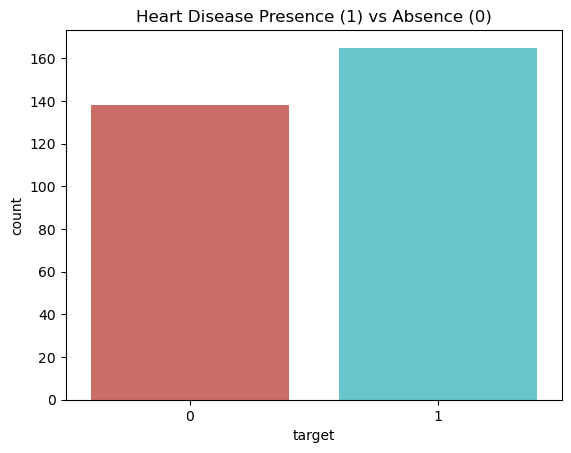

In [10]:
sns.countplot(x='target', data=df,palette='hls')
plt.title("Heart Disease Presence (1) vs Absence (0)")
#plt.savefig('countplot0and1.png')
plt.show()

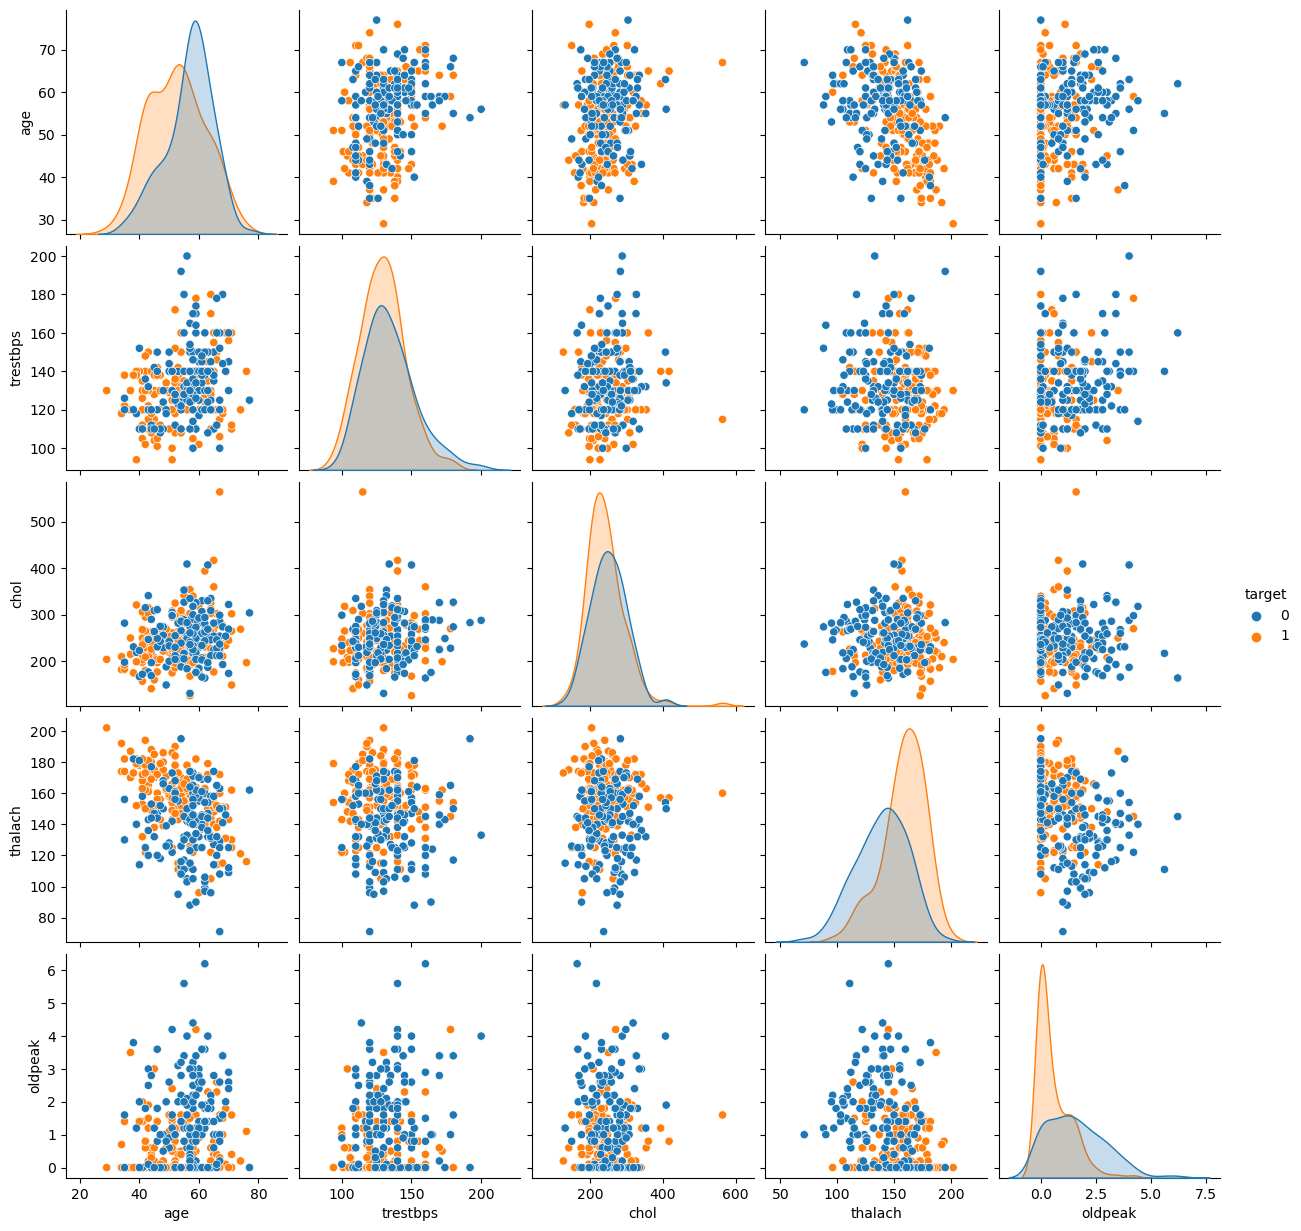

In [11]:
#Pairplot: Visualizing pairwise relationships between key features. The exploratory data analysis involved 
key_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(df[key_features], hue='target', diag_kind='kde')
#plt.savefig('pairplotnew.png')
plt.show()

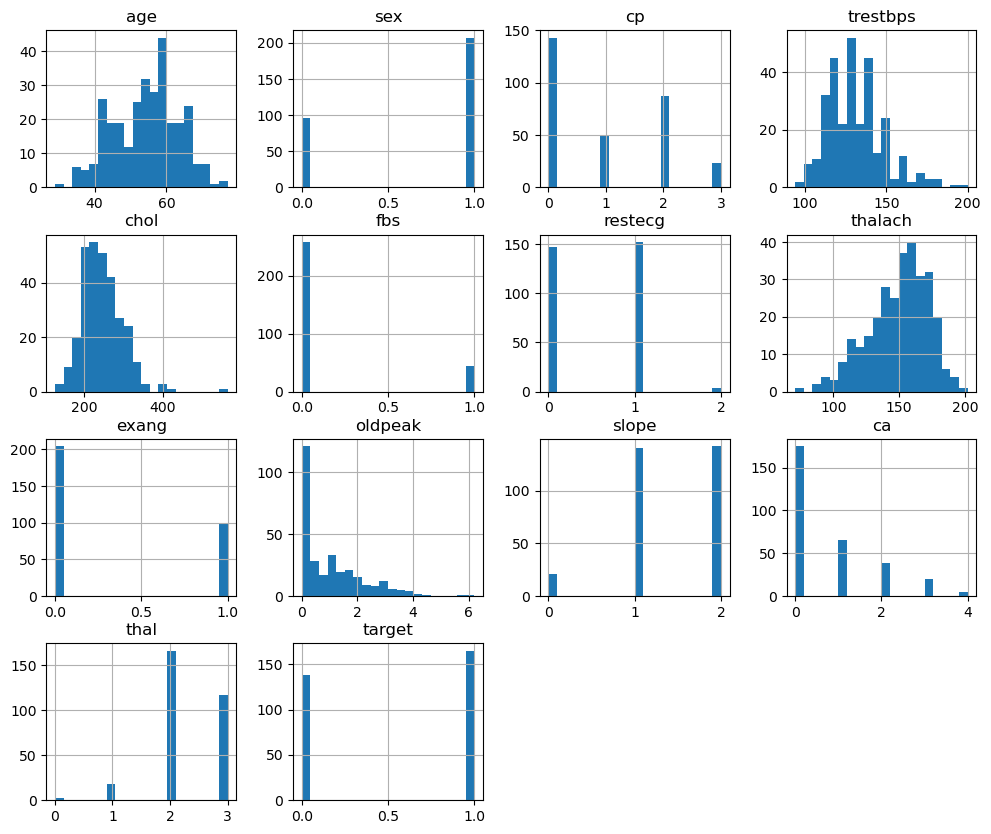

In [12]:
df.hist(figsize=(12, 10), bins=20)
#plt.savefig('histogram_new.png')
plt.show()

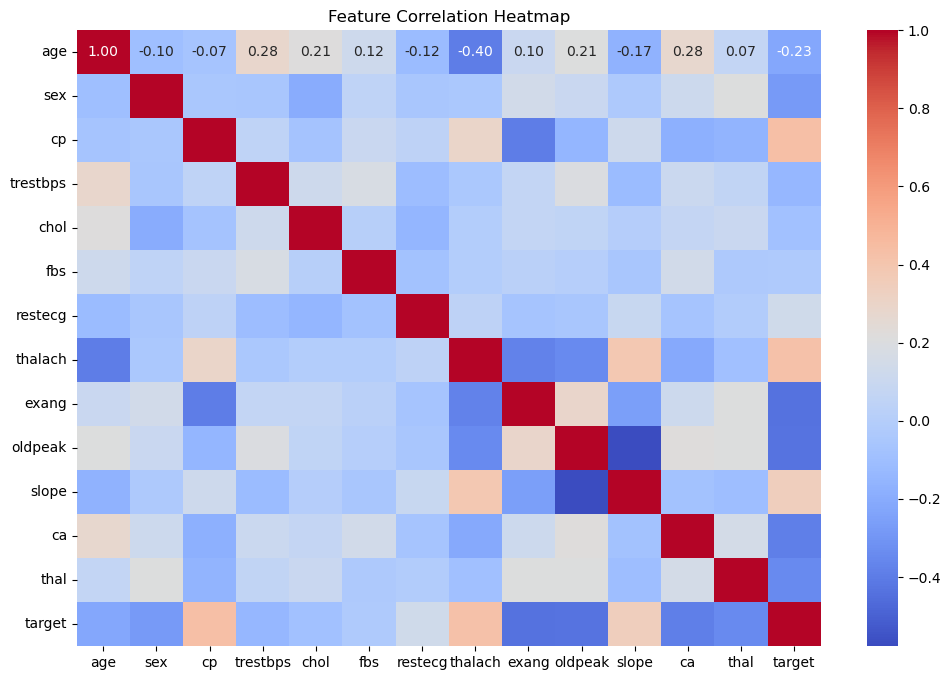

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.savefig('correlation_heatmap.png')
plt.show()

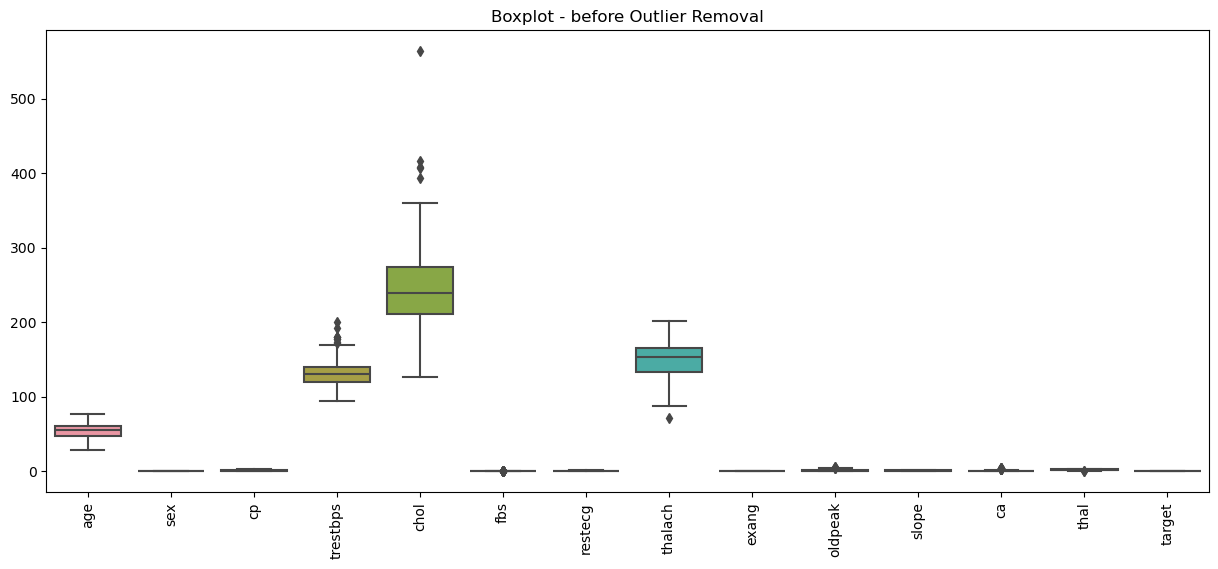

In [14]:
# Boxplot before removing outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot - before Outlier Removal')
plt.savefig('boxplotbefore outlier removal.png')

plt.show()


In [15]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [17]:
df.duplicated().sum()

1

In [18]:
df= df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

In [20]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


## removing outliers

In [21]:
#Remove the outlier
#calculate IQR
q3=df['trestbps'].quantile(.75)
q3
q1=df['trestbps'].quantile(.25)
q1
#find value of iqr
iqr=q3-q1
iqr
#calculate upper and lower limit from iqr
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print(ul,ll)
#upper bound
upper=np.where(df['trestbps']>=ul)
#lower limit
lower=np.where(df['trestbps']<=ll)
#delete the rows above and below lower values
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)
#shape how many rows removed
df.shape
#first convert trestbps value in array
arr=df['trestbps'].values
#if value are in b/n ul and ll represent that values as ture
true_index=(ll<arr)&(arr<ul)
true_index
#so calculate the median of all values other then the ouliers
mid = np.median(df['trestbps'][true_index])
mid
#replace all ouliers with median values
false_index = ~ true_index
df['trestbps'].values[false_index] = mid
df

170.0 90.0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [22]:
#Remove the outlier
#calculate IQR
q3=df['chol'].quantile(.75)
q3
q1=df['chol'].quantile(.25)
q1
#find value of iqr
iqr=q3-q1
iqr
#calculate upper and lower limit from iqr
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print(ul,ll)
#upper bound
upper=np.where(df['chol']>=ul)
#lower limit
lower=np.where(df['chol']<=ll)
#delete the rows above and below lower values
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)
#shape how many rows removed
df.shape
#first convert chol value in array
arr=df['chol'].values
#if value are in b/n ul and ll represent that values as ture
true_index=(ll<arr)&(arr<ul)
true_index
#so calculate the median of all values other then the ouliers
mid = np.median(df['chol'][true_index])
mid
#replace all ouliers with median values
false_index = ~ true_index
df['chol'].values[false_index] = mid
df

371.0 115.0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [23]:
#Remove the outlier
#calculate IQR
q3=df['thalach'].quantile(.75)
q3
q1=df['thalach'].quantile(.25)
q1
#find value of iqr
iqr=q3-q1
iqr
#calculate upper and lower limit from iqr
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print(ul,ll)
#upper bound
upper=np.where(df['thalach']>=ul)
#lower limit
lower=np.where(df['thalach']<=ll)
#delete the rows above and below lower values
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)
#shape how many rows removed
df.shape
#first convert thalach value in array
arr=df['thalach'].values
#if value are in b/n ul and ll represent that values as ture
true_index=(ll<arr)&(arr<ul)
true_index
#so calculate the median of all values other then the ouliers
mid = np.median(df['thalach'][true_index])
mid
#replace all ouliers with median values
false_index = ~ true_index
df['thalach'].values[false_index] = mid
df

210.5 92.5


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [24]:
#Remove the outlier
#calculate IQR
q3=df['thal'].quantile(.75)
q3
q1=df['thal'].quantile(.25)
q1
#find value of iqr
iqr=q3-q1
iqr
#calculate upper and lower limit from iqr
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print(ul,ll)
#upper bound
upper=np.where(df['thal']>=ul)
#lower limit
lower=np.where(df['thal']<=ll)
#delete the rows above and below lower values
df.drop(upper[0],inplace=True)
df.drop(lower[0],inplace=True)
#shape how many rows removed
df.shape
#first convert thal value in array
arr=df['thal'].values
#if value are in b/n ul and ll represent that values as ture
true_index=(ll<arr)&(arr<ul)
true_index
#so calculate the median of all values other then the ouliers
mid = np.median(df['thal'][true_index])
mid
#replace all ouliers with median values
false_index = ~ true_index
df['thal'].values[false_index] = mid
df

4.5 0.5


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


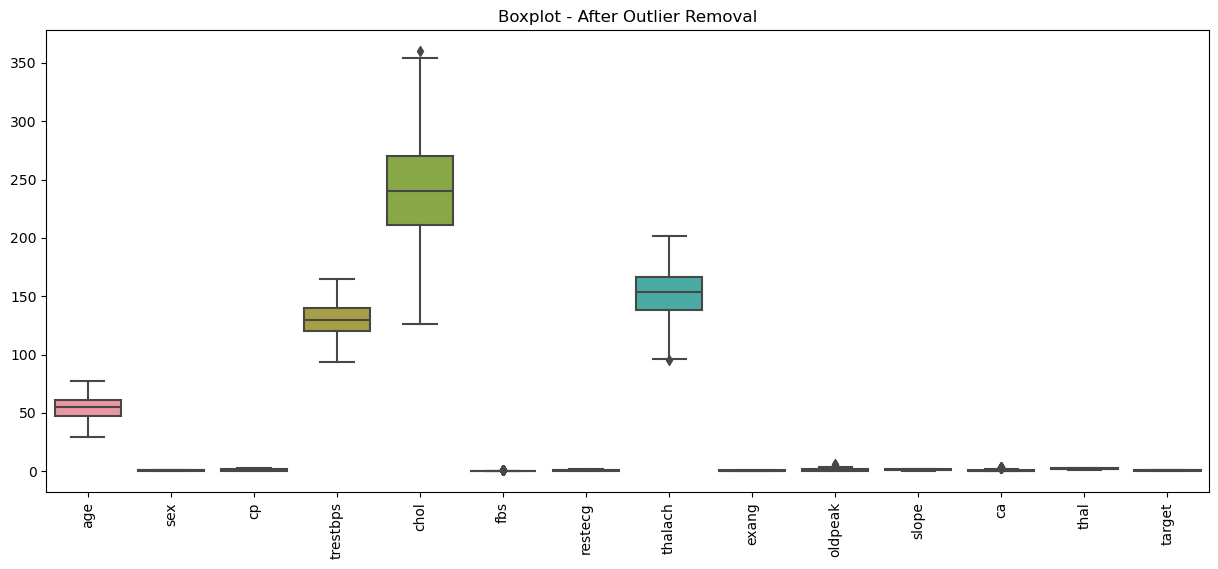

In [25]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot - After Outlier Removal')
#plt.savefig('boxplot_after_outliers_removal.png')
plt.show()

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
df.shape

(279, 14)

In [29]:
df.to_csv('heart_disease_prediction_cleaned_1.csv')